In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# 1. 加载图像并灰度化
image = cv2.imread(r'C:\Users\L3101\Pictures\5678.png')

# image = cv2.resize(image, None, fx=0.5, fy=0.5)
image = cv2.resize(image, (720, 480))

# 转 HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h,s,v= cv2.split(hsv_image)
h_colored = cv2.applyColorMap(h, cv2.COLORMAP_HSV)
# 二值化 (HSV → BGR → 灰度 → 二值)
bina = cv2.threshold(h_colored, 70, 255, cv2.THRESH_BINARY)[1]
gray = cv2.cvtColor(bina, cv2.COLOR_BGR2GRAY)

# 边缘检测
edges = cv2.Canny(gray, 70, 150)

# 霍夫直线检测
lines = cv2.HoughLinesP(edges, 1, np.pi / 720, 160, minLineLength=100, maxLineGap=60)
if lines is not None:
    for line in lines:
        x1_, y1_, x2_, y2_ = line[0]
        cv2.line(image, (x1_, y1_), (x2_, y2_), (0, 255, 0), 2)


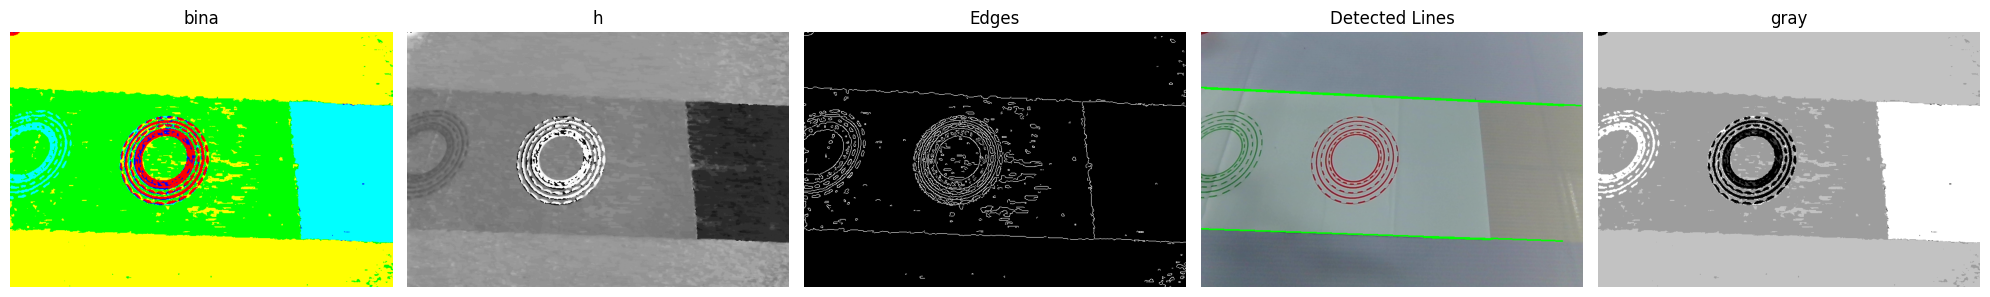

In [43]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].imshow(bina, cmap='gray')
axes[0].set_title('bina')
axes[0].axis('off')

axes[1].imshow(h, cmap='gray')
axes[1].set_title('h')
axes[1].axis('off')

axes[2].imshow(edges, cmap='gray')
axes[2].set_title('Edges')
axes[2].axis('off')

if len(image.shape) == 3:
    axes[3].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
else:
    axes[3].imshow(image, cmap='gray')
axes[3].set_title('Detected Lines')
axes[3].axis('off')

axes[4].imshow(gray, cmap='gray')
axes[4].set_title('gray')
axes[4].axis('off')

plt.tight_layout()
plt.show()
